In [ ]:
!pip install seaborn numpy matplotlib

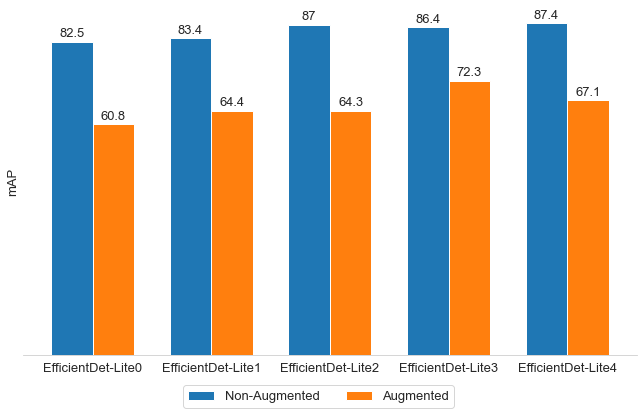

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = ['EfficientDet-Lite0', 'EfficientDet-Lite1', 'EfficientDet-Lite2', 'EfficientDet-Lite3', 'EfficientDet-Lite4']
Non_Augmented = [0.825, 0.834, 0.870, 0.864, 0.874]
Non_Augmented = [ x*100 for x in Non_Augmented ]
Augmented = [0.608, 0.644, 0.643, 0.723, 0.671]
Augmented = [ x*100 for x in Augmented ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Non_Augmented, width, label='Non-Augmented')
rects2 = ax.bar(x + width/2, Augmented, width, label='Augmented')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mAP', fontsize=13)
#ax.set_title('mAP of Models with and without Augmented Images')
ax.set_xticks(x, labels)
ax.set_yticks([])
ax.grid(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(bbox_to_anchor=(0.25, -0.17), loc="lower left", ncol=2, prop={'size': 13})

ax.bar_label(rects1, padding=2, fontsize=13)
ax.bar_label(rects2, padding=2, fontsize=13)

fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(10)


plt.show()

### Trade-Off Between Latency and Performance

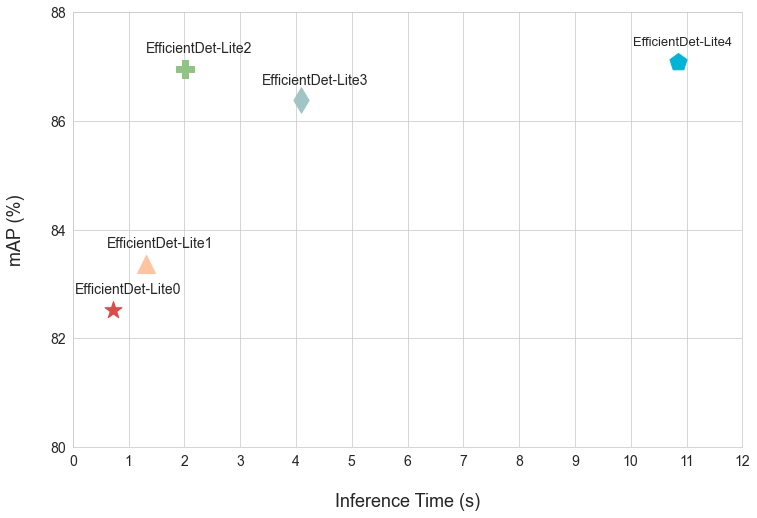

In [89]:
M_reduced_plot_test = np.array([[0.72976, 0.825286*100],
                                [1.31578, 0.833719*100],
                                [2.00918, 0.869550*100],
                                [4.08524, 0.863767*100],
                                [10.04746, 0.873883*100]])
word2Ind_plot_test = {'EfficientDet-Lite0': 0,
                      'EfficientDet-Lite1': 1,
                      'EfficientDet-Lite2': 2,
                      'EfficientDet-Lite3': 3,
                      'EfficientDet-Lite4': 4}
words = ['EfficientDet-Lite0',
         'EfficientDet-Lite1',
         'EfficientDet-Lite2',
         'EfficientDet-Lite3',
         'EfficientDet-Lite4']

sns.set_style('whitegrid')

def plot_embeddings(M_reduced, word2Ind, words):
    plt.figure(figsize=(12, 8))
    """ 
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    s = 18**2
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        if (word == 'EfficientDet-Lite0'):
            plt.scatter(x, y, marker='*', color='#dd4a48', s=s)
            plt.text(x-.7, y+.30, word, fontsize=14)
        elif (word == 'EfficientDet-Lite1'):
            plt.scatter(x, y, marker='^', color='#ffc3a0', s=s)
            plt.text(x-.7, y+.30, word, fontsize=14)
        elif (word == 'EfficientDet-Lite2'):
            plt.scatter(x, y, marker='P', color='#91c483', s=s)
            plt.text(x-.7, y+.30, word, fontsize=14)
        elif (word == 'EfficientDet-Lite3'):
            plt.scatter(x, y, marker='d', color='#a0c5c4', s=s)
            plt.text(x-.7, y+.30, word, fontsize=14)
        elif (word == 'EfficientDet-Lite4'):
            plt.scatter(x+.8, y-.3, marker='p', color='#00b4d8', s=s)
            plt.text(x, y, word, fontsize=13)
        else:
            plt.scatter(x, y, marker='o', color='blue', s=s)
            plt.text(x-50, y+.60, word, fontsize=13)
    plt.xlabel('\nInference Time (s)', fontsize=18)
    plt.ylabel('mAP (%)\n', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(xmin=0)
    plt.xticks([i for i in range(0, 13, 1)])
    plt.yticks([i for i in range(80, 90, 2)])
    plt.savefig('F:/Downloads/dogs/tf/evaluation/Results/Screenshots/map-inference.png')
    plt.show()
    
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)